In [1]:
import pandas as pd
df = pd.read_csv('Result_2.csv', usecols= ['salary','last_unit_id'])
df.head(4)

,salary,last_unit_id
0,101442,17
1,111474,215
2,76446,194
3,98184,218


In [2]:
from collections import defaultdict
dsalary = defaultdict(list)
for row in df.iloc():
    officer_salary = row[0]
    unit_id = row[1]
    if unit_id in dsalary:
        dsalary[unit_id].append(officer_salary)
    else:
        dsalary[unit_id] = [officer_salary]

In [5]:
open('salary_combination.txt', 'w').close()
for key in dsalary.keys():
    officer_salary = dsalary[key]
    salarys = []
    f = open("salary_combination.txt", "a")
    for one in officer_salary:
        for two in officer_salary:
            if one == two:
                continue
            else:
                salarys.append(str(one) + ' ' + str(two) + ' \n')
    f.writelines(salarys)
    f.close()

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sa = nx.read_edgelist('salary_combination.txt', create_using=nx.Graph(), nodetype=str)
print(nx.info(sa))

Name: 
Type: Graph
Number of nodes: 393
Number of edges: 62343
Average degree: 317.2672


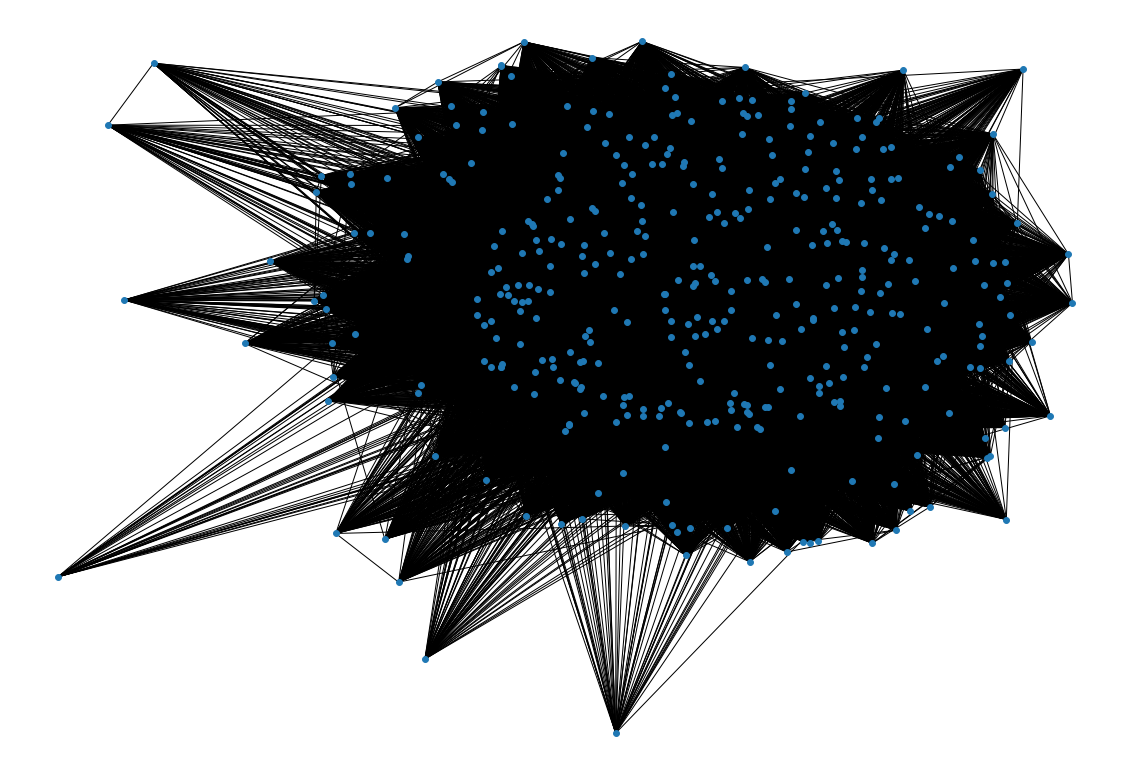

In [7]:
# create a spring-layout of sa
pos = nx.spring_layout(sa)

plt.figure(figsize=(20,14))

plt.axis('off')

nx.draw_networkx(sa, pos=pos, with_labels=False, node_size=35)

In [8]:
# find the order and size of our network
print(sa.order())
print(sa.size())

393
62343


In [9]:
print(nx.betweenness_centrality(sa, normalized=True))

{'101442': 0.0007007734475751869, '99444': 0.0006656290850094968, '99756': 0.0007858216104701651, '65646': 0.0011148298976465655, '107988': 0.0008817816422733591, '100440': 0.0003157218486774525, '73968': 0.0008845612651683514, '96084': 0.0007927952619950353, '185364': 0.00028742547035872366, '68262': 0.001432823260536322, '76446': 0.0011111413732818188, '84396': 0.0007222289941593615, '67884': 0.0007495842446796573, '82152': 0.000939033327843436, '80400': 0.0011481007113803771, '82008': 0.0008306561887953344, '63672': 0.0006429047657677256, '85818': 0.0006911642425162475, '83214': 0.0007384821692504539, '62742': 0.0010276729035246085, '88578': 0.0005692576100898973, '97044': 0.001058988133635113, '96648': 0.0009716448305047675, '61518': 0.0005590807057309941, '87780': 0.00031838525777665134, '86142': 0.0010812188220677976, '70296': 0.0005803435994487612, '63456': 0.0010276729035246085, '75102': 0.0012676450368757377, '98184': 0.0002797042601828373, '78006': 0.0009738063755921862, '937

In [10]:
print(sa.degree()) # find the number of degree

[('101442', 375), ('99444', 368), ('99756', 368), ('65646', 387), ('107988', 378), ('100440', 328), ('73968', 379), ('96084', 370), ('185364', 324), ('68262', 392), ('76446', 387), ('84396', 369), ('67884', 376), ('82152', 382), ('80400', 386), ('82008', 380), ('63672', 368), ('85818', 365), ('83214', 373), ('62742', 387), ('88578', 360), ('97044', 384), ('96648', 381), ('61518', 362), ('87780', 337), ('86142', 388), ('70296', 364), ('63456', 387), ('75102', 387), ('98184', 337), ('78006', 385), ('93708', 372), ('70488', 380), ('72810', 387), ('90456', 361), ('161664', 274), ('82746', 360), ('90960', 349), ('86910', 318), ('72516', 375), ('102564', 382), ('76764', 363), ('72480', 372), ('72726', 372), ('87918', 345), ('93648', 379), ('74946', 387), ('70062', 336), ('90846', 340), ('105864', 370), ('79926', 391), ('87048', 346), ('84876', 384), ('80022', 363), ('75372', 391), ('86130', 385), ('91404', 363), ('54672', 379), ('58572', 392), ('55764', 388), ('73116', 390), ('60600', 391), 

In [11]:
# find the number of triangles in the network
print(nx.triangles(sa))

{'101442': 59959, '99444': 58355, '99756': 57893, '65646': 61524, '107988': 60031, '100440': 49417, '73968': 60361, '96084': 58376, '185364': 48930, '68262': 61951, '76446': 61556, '84396': 58370, '67884': 60013, '82152': 60871, '80400': 61210, '82008': 60585, '63672': 58450, '85818': 57733, '83214': 59451, '62742': 61655, '88578': 56690, '97044': 61045, '96648': 60637, '61518': 57294, '87780': 51846, '86142': 61733, '70296': 57624, '63456': 61655, '75102': 61198, '98184': 52195, '78006': 61429, '93708': 59203, '70488': 60652, '72810': 61655, '90456': 56870, '161664': 36658, '82746': 57061, '90960': 54303, '86910': 47595, '72516': 59744, '102564': 60910, '76764': 57434, '72480': 59406, '72726': 58796, '87918': 53857, '93648': 60464, '74946': 61399, '70062': 51324, '90846': 52633, '105864': 58752, '79926': 61914, '87048': 53792, '84876': 61375, '80022': 57466, '75372': 61914, '86130': 61352, '91404': 57242, '54672': 60172, '58572': 61951, '55764': 61583, '73116': 61824, '60600': 61897, 

In [12]:
print(nx.clustering(sa))

{'101442': 0.855030303030303, '99444': 0.8641600521265252, '99756': 0.8573184456817913, '65646': 0.8237137004458368, '107988': 0.8425048769876357, '100440': 0.9214775863354964, '73968': 0.8426658848822437, '96084': 0.8551380648941624, '185364': 0.9350991858731796, '68262': 0.8083798736886059, '76446': 0.824142132251543, '84396': 0.859697183928361, '67884': 0.8512482269503546, '82152': 0.8364733204160998, '80400': 0.8237669066684611, '82008': 0.8413414803499514, '63672': 0.8655668759625637, '85818': 0.8690802348336595, '83214': 0.8569142955980282, '62742': 0.8254675931504465, '88578': 0.8772825750541628, '97044': 0.8301376196692777, '96648': 0.8376433209006768, '61518': 0.8768460843880566, '87780': 0.9157481983891479, '86142': 0.8222515250805829, '70296': 0.8722186904005086, '63456': 0.8254675931504465, '75102': 0.8193490514252052, '98184': 0.9219125335594178, '78006': 0.8310200216450216, '93708': 0.8579398892849898, '70488': 0.8422719066796278, '72810': 0.8254675931504465, '90456': 0.8

(array([301.,  36.,  20.,  14.,   9.,   8.,   3.,   1.,   0.,   1.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

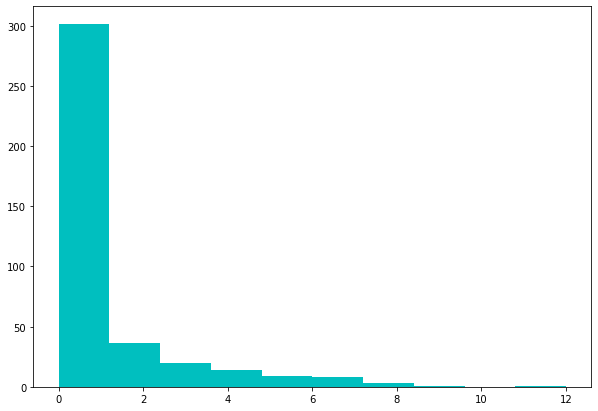

In [13]:
# draw histogram of degrees
plt.figure(figsize=(10,7))
hst = nx.degree_histogram(sa)
plt.hist(hst, bins=10, color='c')

<BarContainer object of 393 artists>

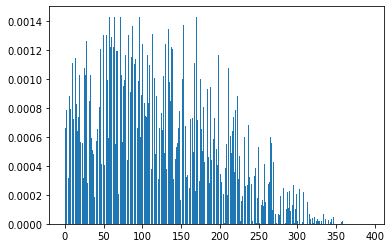

In [14]:
# draw a bar chart of the betweenness centrality
bc = nx.betweenness_centrality(sa)
plt.bar(range(len(bc)), bc.values(), align='center')